In [57]:
# Linear Classification Model

In [58]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Loading the data

# Load data using bp package
npzfile = np.load("../datasets/toy_data_two_moon.npz")

# The compresed numpy file is split up into 4 parts
# Lets convert them to Pytoch Float Tensors
# Train inputs and target outputs
x_train = torch.FloatTensor(npzfile['arr_0'])
y_train = torch.FloatTensor(npzfile['arr_2'])

x_test = torch.FloatTensor(npzfile['arr_1'])
y_test = torch.FloatTensor(npzfile['arr_3'])

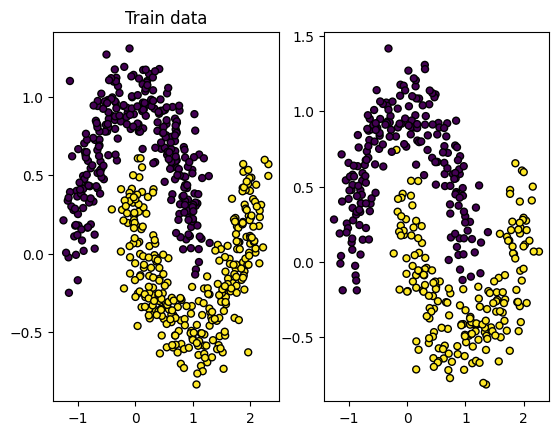

In [60]:
# Lets plot the data to see how it looks like
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train[:, 0], s=25, edgecolors="k")
plt.title("Train data")
plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], marker="o", c=y_test[:, 0], s=25, edgecolors="k")

In [61]:
# Define our linear model with 2 inputs and 1 output also note that bias is included in the linear model
linear = nn.Linear(2, 1)
# Define our loss function as MSE
loss_function = nn.MSELoss()
# Create our optimizer with lr = 0.1
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
# Number of times we iterate over the dataset
max_epoch = 1000

loss_logger = []
accuracy_logger = []
for epoch in range(max_epoch):
    with torch.no_grad():
        y_test_hat = linear(x_test)
        class_pred = (y_test_hat > 0.5).float()
        accuracy_logger.append(float(sum(class_pred == y_test)/float(y_test.shape[0])))

    # Perform a training step
    y_train_hat = linear(x_train)
    loss = loss_function(y_train_hat, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

print("Accuracy of linear model: %.2f%", (accuracy_logger[-1] * 100))


Accuracy of linear model: %.2f% 88.24999928474426


Text(0, 0.5, 'Accuracy')

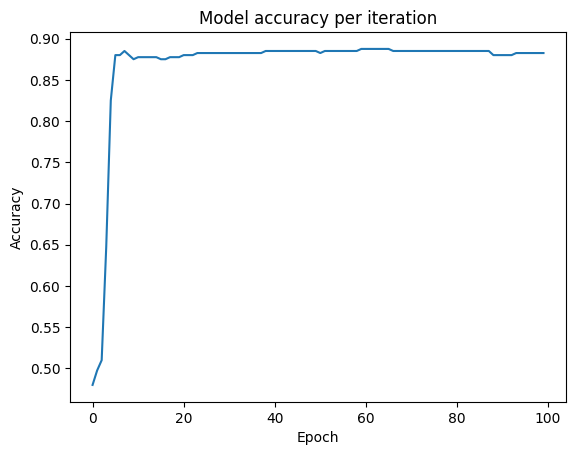

In [63]:
plt.plot(accuracy_logger)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'MSE loss')

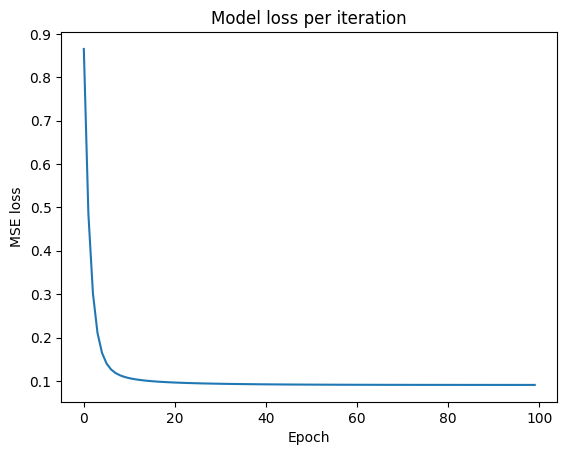

In [64]:
plt.plot(loss_logger)
plt.title("Model loss per iteration")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")

In [65]:
# Linear model using Cross Entropy loss

# Define our Linear model with 2 inputs and 1 output
logistic_linear = nn.Linear(2, 1)

# Define our loss function
loss_function = nn.BCEWithLogitsLoss()

# Create out optimizer with lr = 0.1
logistic_optimizer =  torch.optim.SGD(logistic_linear.parameters(), lr=0.1)

In [66]:
# Number of times we iterate over the dataset
max_epoch = 1000

logistic_loss_logger = []
logistic_accuracy_logger = []
for epoch in range(max_epoch):
    with torch.no_grad():
        y_test_hat = logistic_linear(x_test)
        class_pred = (y_test_hat > 0).float()
        logistic_accuracy_logger.append(float(sum(class_pred == y_test)/float(y_test.shape[0])))

    # Perform a training step
    y_train_hat = logistic_linear(x_train)
    loss = loss_function(y_train_hat, y_train)

    logistic_optimizer.zero_grad()
    loss.backward()
    logistic_optimizer.step()

    logistic_loss_logger.append(loss.item())

print("Accuracy of logistic_linear model: %.2f%", (logistic_accuracy_logger[-1] * 100))


Accuracy of logistic_linear model: %.2f% 85.75000166893005


Text(0, 0.5, 'Logistic Accuracy')

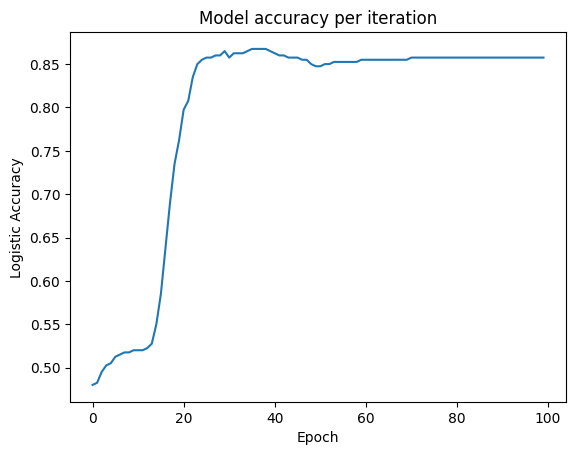

In [67]:
plt.plot(logistic_accuracy_logger)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Logistic Accuracy")

Text(0, 0.5, 'BCE loss')

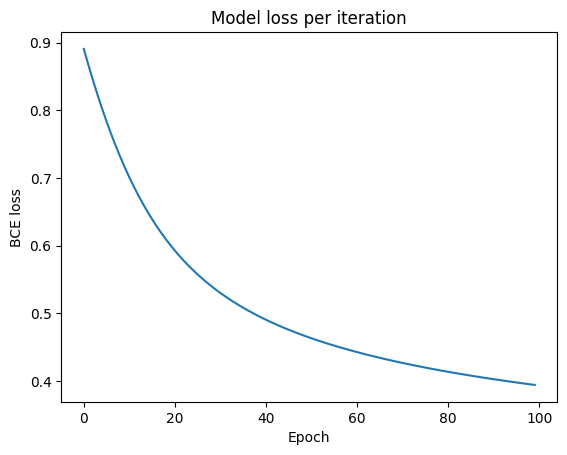

In [68]:
plt.plot(logistic_loss_logger)
plt.title("Model loss per iteration")
plt.xlabel("Epoch")
plt.ylabel("BCE loss")